In [27]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
def start():
    return True

def perceptualstep(type="middle"):
    if type == "middle": time_ms = 100
    if type == "slow": time_ms = 200
    if type == "fast": time_ms = 50
    return time_ms

def cognitivestep(type="middle"):
    if type == "middle": time_ms = 70
    if type == "slow": time_ms = 170
    if type == "fast": time_ms = 25
    return time_ms

def motorstep(type="middle"):
    if type == "middle": time_ms = 70
    if type == "slow": time_ms = 100
    if type == "fast": time_ms = 30
    return time_ms

In [5]:
def example1():
    total_time = 0
    total_time += perceptualstep()
    total_time += cognitivestep()
    total_time += motorstep()
    return total_time

In [18]:
def example2(completess="extremes"):
    if completess == None: "all"

    if completess == "extremes":
        total_time_slow = 0
        total_time_slow += perceptualstep("slow")
        total_time_slow += cognitivestep("slow")
        total_time_slow += motorstep("slow")

        total_time_middle = 0
        total_time_middle += perceptualstep("middle")
        total_time_middle += cognitivestep("middle")
        total_time_middle += motorstep("middle")

        total_time_fast = 0
        total_time_fast += perceptualstep("fast")
        total_time_fast += cognitivestep("fast")
        total_time_fast += motorstep("fast")

        print("Fastman: " + str(total_time_fast) + "ms")
        print("Middleman: " + str(total_time_middle) + "ms")
        print("Slowman: " + str(total_time_slow) + "ms")
        return True

    if completess == "all":
        label = []
        total_time = []

        for percept in ["slow", "fast", "middle"]:
            for cogni in ["slow", "fast", "middle"]:
                for motor in ["slow", "fast", "middle"]:
                    total_time_option = 0
                    label.append(str(percept) + " "  + str(cogni) + " " +str(motor))

                    total_time_option += perceptualstep(percept)
                    total_time_option += cognitivestep(cogni)
                    total_time_option += motorstep(motor)

                    total_time.append(total_time_option)
        value_series = pd.Series(total_time, name='Value')
        label_series = pd.Series(label, name='Label')
        df = pd.concat([value_series, label_series], axis=1)

        return df

In [6]:
example1()

240

In [20]:
df_res = example2("all")

Text(0, 0.5, 'Time (ms)')

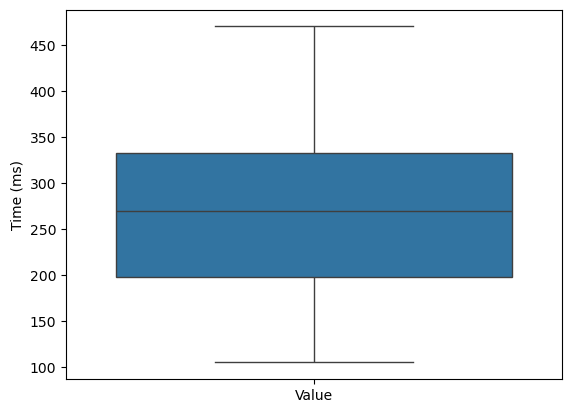

In [31]:
sb.boxplot(data=df_res)

plt.ylabel("Time (ms)")



In [36]:
def example3():
    label = []
    total_time = []

    for percept in ["slow", "fast", "middle"]:
        for cogni in ["slow", "fast", "middle"]:
            for motor in ["slow", "fast", "middle"]:
                total_time_option = 0
                label.append(str(percept) + " "  + str(cogni) + " " +str(motor))

                total_time_option += perceptualstep(percept)
                total_time_option += perceptualstep(percept)
                total_time_option += cognitivestep(cogni)
                total_time_option += motorstep(motor)

                total_time.append(total_time_option)
    value_series = pd.Series(total_time, name='Value')
    label_series = pd.Series(label, name='Label')
    df = pd.concat([value_series, label_series], axis=1)

    return df

In [37]:
example3()

,Value,Label
0,670,slow slow slow
1,600,slow slow fast
2,640,slow slow middle
3,525,slow fast slow
4,455,slow fast fast
5,495,slow fast middle
6,570,slow middle slow
7,500,slow middle fast
8,540,slow middle middle
9,370,fast slow slow


In [42]:
def example4():
    label = []
    total_time = []

    cog_times = [40,80,110,150,210,240]

    for percept in ["slow", "fast", "middle"]:
        for cogni in ["slow", "fast", "middle"]:
            for motor in ["slow", "fast", "middle"]:

                for second in cog_times:
                    total_time_option = 0
                    stim1 = perceptualstep(percept)
                    if second <= stim1:
                        total_time_option += 2*stim1
                    else:
                        total_time_option += 2*stim1
                        total_time_option += second - stim1

                    total_time_option += cognitivestep(cogni)
                    total_time_option += motorstep(motor)

                    label.append(str(second) + "ms " + str(percept) + " "  + str(cogni) + " " +str(motor))
                    total_time.append(total_time_option)
    value_series = pd.Series(total_time, name='Value')
    label_series = pd.Series(label, name='Label')
    df = pd.concat([value_series, label_series], axis=1)

    return df

In [43]:
example4()

,Value,Label
0,670,40ms slow slow slow
1,670,80ms slow slow slow
2,670,110ms slow slow slow
3,670,150ms slow slow slow
4,680,210ms slow slow slow
...,...,...
157,340,80ms middle middle middle
158,350,110ms middle middle middle
159,390,150ms middle middle middle
160,450,210ms middle middle middle


In [47]:
def update_error(type1,val):
    val2 = 0
    if type1 == "slow": val2 = val * 0.5
    if type1 == "middle": val2 = val * 2
    if type1 == "fast": val2 = val * 3

    return val2



def example5():
    label = []
    total_time = []
    error_prob_total = []


    for percept in ["slow", "fast", "middle"]:
        for cogni in ["slow", "fast", "middle"]:
            for motor in ["slow", "fast", "middle"]:
                total_time_option = 0
                error_prob = 0.01

                total_time_option += 2*perceptualstep(percept)
                error_prob = update_error(percept,error_prob)

                total_time_option += cognitivestep(cogni)
                error_prob = update_error(cogni,error_prob)

                total_time_option += motorstep(motor)
                error_prob = update_error(motor,error_prob)


                label.append(str(percept) + " "  + str(cogni) + " " +str(motor))
                total_time.append(total_time_option)
                error_prob_total.append(error_prob)
    value_series = pd.Series(total_time, name='Value')
    erroe_series = pd.Series(error_prob_total, name='Error')
    label_series = pd.Series(label, name='Label')
    df = pd.concat([value_series, erroe_series, label_series], axis=1)

    return df

In [49]:
df_res5 = example5()

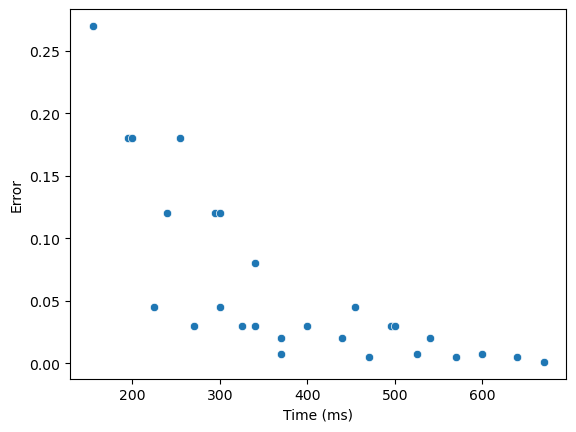

In [53]:
sb.scatterplot(data=df_res5, x='Value', y='Error')

# Show plot
plt.xlabel("Time (ms)")
plt.ylabel("Error")
plt.show()